# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

## 1. Compare word frequencies between two works of a single author

In [6]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

def cleanWord (w):
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    return re.sub('^[0-9\.]*$', "", wn)
       
def get_wf (URL):
    r = requests.get(URL)
    
    t = cleanHtml (r.text) .lower()
    t = cleanWord(t)
    
    wds = re.split('\s+',t)
    
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    wf = Counter (wds)
    
    for k in stop_words:
        wf.pop(k, None)
        
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    return (wfs [ 0:ml ] [::-1], tw)
        
        
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/64317.txt.utf-8')
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/805.txt.utf-8')

### Plot the differences between Great Gatsby and The Side of Paradise 

The plot shows that in Great Gatsby, Gatsby is the most used word and in The Side of Paradise, Amory is the most used word as they are the main characters of the books.

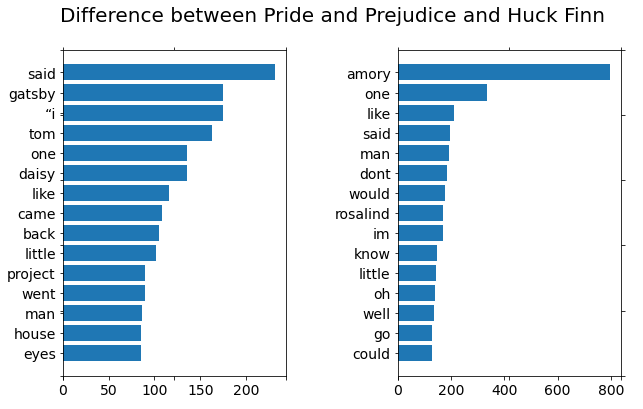

In [7]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax.spines ['top'] .set_color ('none')
    ax.spines ['bottom'] .set_color ('none')
    ax.spines ['left'] .set_color ('none')
    ax.spines ['right'] .set_color ('none')
    ax.tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_ee, wf_bu, 'Difference between Pride and Prejudice and Huck Finn')

## 2. Compare word frequencies between works of two authors.

The plot shows that in Great Gatsby, words related to Gatsby's house and words like "man" are the most used, and in Alice's Adventures in Wonderland, words related to the "Wonderland" is the most used like queen, king, little.

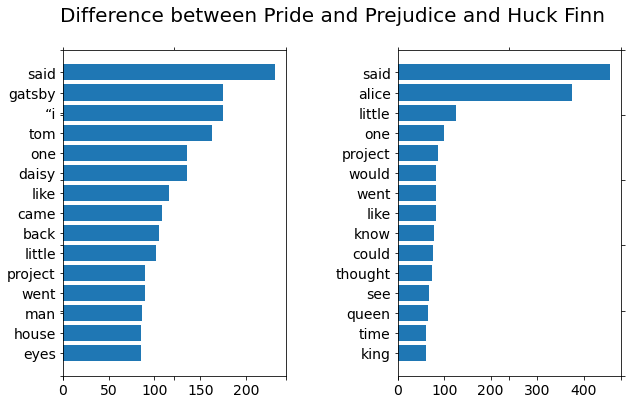

In [8]:
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/11.txt.utf-8')

plotTwoLists (wf_ee, wf_bu, 'Difference between Pride and Prejudice and Huck Finn')